In [1]:
import clustertools as cts
from clustertools.analysis.functions import meq_func
import numpy as np
import matplotlib.pyplot as plt

/Users/webbjere/Codes/clustertools/clustertools/analysis/profiles.py:34: FutureWarning: all profiles are setup such that the returned radial bins and profile values are in linear space and not normalized by the effective radius. Previously select profiles had unique returns.
  warnings.warn('all profiles are setup such that the returned radial bins and profile values are in linear space and not normalized by the effective radius. Previously select profiles had unique returns.',FutureWarning)



# Functions

Load a snapshot of a cluster in file 00000.dat, which has position units of pc and velocity units of km/s in clustercentric coordinates. Stellar masses are in solar units and were generated using a Salpeter IMF.

In [2]:
cluster=cts.load_cluster('snapshot',filename='00000.dat',units='pckms',origin='cluster',ofilename='orbit.dat',ounits='kpckms')

Once initialized, any function within ``clustertools`` can be called internally via ``cluster.function_name()`` or externally via ``output=function_name(cluster)``. An internal call sets variables within ``cluster`` while an external call will return the calculated values but change nothing within ``cluster``.

In the event that the snapshot is not centered, the centre of the cluster can be found via:

In [3]:
cluster.find_centre()

(-0.14946119556654258,
 -0.22087743738380078,
 -0.038780116570714403,
 0.014544487149392757,
 -0.097072929729564258,
 -0.028231116712277449)

which not only returns the position and velocity of the centre of mass, but also sets ``cluster.xc``, ``cluster.yc``, ``cluster.zc``, ``cluster.vxc``, ``cluster.vyc``, ``cluster.vzc`` Alternatively, if you don't want to set any ``StarCluster`` variables just call the function externally:

In [4]:
xc,yc,zc,vxc,vyc,vzc=cts.find_centre(cluster)
print(xc,yc,zc)

-0.149461195567 -0.220877437384 -0.0387801165707


It is important to note that, by default, the centre is calculated to be the centre of density. Similar to NBODY6 and phigrape, once the centre of density is found for the entire cluster population, a centralized subset of stars within an ever decreasing radius are used to find the true centre of density. The parameters ``rmin`` and ``nmax`` set the minimum radius that can encompass the subset of stars and the maximum number of stars within the subset. 

Setting ``density=False`` will instead find a central subset of stars to find the cluster's of centre by removing stars beyond ``nsigma`` standard deviations of the previously calculated centre. For systems with a large number of escaped stars, which make finding the cluster's centre difficult, it may also help to tell the function where to start. For example, it is possible to tell the cluster to start looking for the centre 1 pc away from the origin along the x-axis and remove stars beyond two standard deviations via:

In [5]:
cluster.find_centre(xstart=1.,density=False, nsigma=1)

(0.47255599444213536,
 -0.046784905321136626,
 0.03368417753435262,
 0.0073060547641532469,
 -0.05167863301943116,
 -0.0025985741474006487)

Other functions that can be called include:

In [6]:
print('Half-Mass Relaxation Time: ',cluster.half_mass_relaxation_time())
print('Core Relaxation Time: ',cluster.core_relaxation_time())
print('Lagrange Radii: ',cluster.rlagrange())
print('Virial Radius: ',cluster.virial_radius())

Half-Mass Relaxation Time:  50.5231000207
Core Relaxation Time:  14.8385051821
Lagrange Radii:  [0.73326598977617097, 1.0765583789354674, 1.3646287125197105, 1.7124821982817706, 1.9617869129434311, 2.3496933983866723, 3.1257216188480137, 3.9773141578345004, 5.0211933936198365, 8.3242591110873079]
Virial Radius:  2.51937714706


All functions allow for projected values to be used instead:

In [7]:
print('Half-Mass Relaxation Time: ',cluster.half_mass_relaxation_time(projected=True))
print('Core Relaxation Time: ',cluster.core_relaxation_time(projected=True))
print('Lagrange Radii: ',cluster.rlagrange(projected=True))
print('Virial Radius: ',cluster.virial_radius(projected=True))

Half-Mass Relaxation Time:  33.8815120123
Core Relaxation Time:  7.87025594154
Lagrange Radii:  [0.49097752209716733, 0.7013820946414554, 0.95595297621692432, 1.2127055798991366, 1.5030278513713957, 1.8280543898615964, 2.3000812878962313, 3.068226381254116, 4.1294671402214904, 8.1792344411375115]
Virial Radius:  1.57999162536


The core radius of the cluster can be calculated by finding where the density drops to 1/3 the central value. The parameter ``mfrac`` sets the mass fraction of the cluster that defintes the central region (default 0.1). When ``projected=True`` the core radius is where the density drops to 1/2 the central value. ``rcore`` also has a plotting feature

0.853249156969


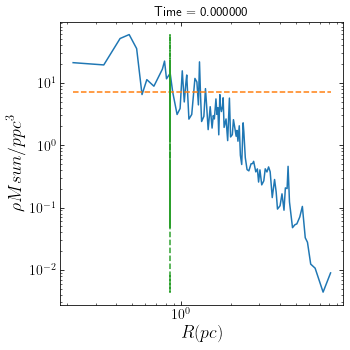

In [8]:
cluster.rcore(plot=True)
print(cluster.rc)

It is also possible to easily measure the mass function and its slope within a given mass range:

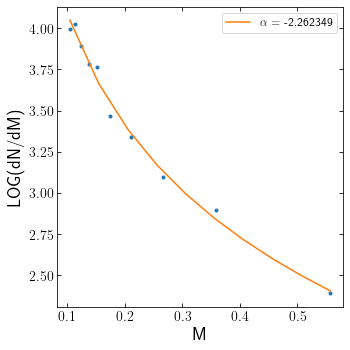

In [9]:
m_mean, m_hist, dm, alpha, ealpha, yalpha, eyalpha=cts.mass_function(cluster,mmin=0.1,mmax=0.8,plot=True)

Calling the mass function function internally simply sets the value of alpha and saves the mass range over which alpha was measured with cluster.mmin and cluster.mmax 

In [10]:
cluster.mass_function(mmin=0.1,mmax=0.8)

-2.2623485836819826

Looking at how velocity dispersion changes as a function of stellar mass is also a proxy for a cluster's dynamical state, with the power-law slope eta evolving towards (but never reaching) -0.5. An eta of -0.5 corresponds to a state of complete energy equipartition. The external call to ``eta_function`` (shown below) and the internal call behave similarly to ``mass_function`` above.

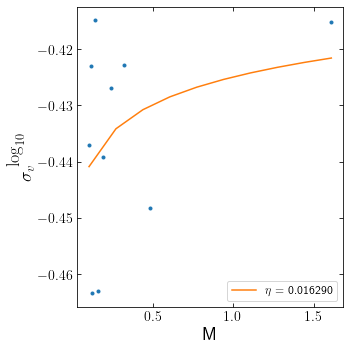

In [11]:
m_mean, sigvm, eta, eeta, yeta, eyeta=cts.eta_function(cluster,plot=True)

Alternatively, as per Bianchini et al. 2016, the state of energy equipartition can be probed by the meq parameter

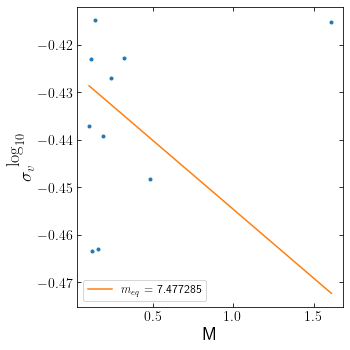

In [12]:
m_mean, sigvm, meq, emeq, ymeq, eymeq=cts.meq_function(cluster,plot=True)

Similarly, as per Bianchini et al. 2018, MNRAS, 475, 96, if you can measure meq you can also measure the kinematic concentration ck, which is the ratio of meq within the half-mass radius to meq at the half mass radius:

In [13]:
cluster.ckin()

1.0000000000004985

If the cluster's galactocentric position and velocity are known, then its tidal radius and limiting radius can also be determined. Note when calculating the limiting radius, it is possible to select ``plot=True`` to see how the cluster's density profile reaches the background density. 

Note that you need to specify a ``galpy`` potential in order to calclated these values. For a Milky Way-like external tidal field, MWPotential2014 from Bovy J., 2015, ApJS, 216, 29 is useful. Different potentials can be used by assigning a ``galpy`` potential to the ``pot`` variable.


Tidal Radius:  10.6993452944
Limiting Radius:  5.35685836913


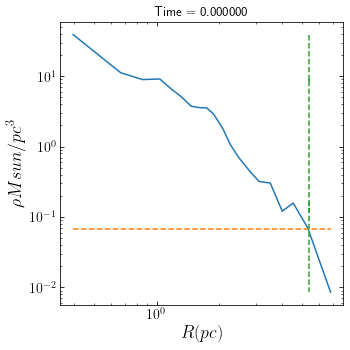

In [14]:
from galpy.potential import MWPotential2014

print('Tidal Radius: ',cluster.rtidal(pot=MWPotential2014))
print('Limiting Radius: ',cluster.rlimiting(pot=MWPotential2014,plot=True))

It is also worth noting that it is possible to calculate the tidal radius iteratively. For example, lets assume a snapshot also contains a large number of stars that are likely not members of the cluster. By setting ``rtiterate>0``, ``clustertools`` will first calculate the tidal radius using the mass of all stars in the snapshot (rt_old). However it will then calculate the tidal radius using only the mass of stars within the initial calculation (rt_new). This process is repeated ``rtiterate`` times or until the ratio of rt_new/rt_old is not less than ``rtconverge``, which by default is 0.9.

In [15]:
print('Tidal Radius: ',cluster.rtidal(pot=MWPotential2014,rtiterate=10))

Tidal Radius:  10.6993452944


Since not all snapshot will contain the energy of each star, ``clustertools`` can calculate these values as well by simply calling:

In [16]:
ek, pot=cts.energies(cluster)

If energies were instead called internally, such that ``cluster.ek``,``cluster.pot``,``cluster.etot`` are set, a subset of stars could be defined that are gravitationally bound (E<0):

In [17]:
cluster.energies()
bound_cluster=cts.sub_cluster(cluster,emax=0.)

Calling ``energies`` internally also set the virial parameter Qvir:

In [18]:
print('Qvir = ',cluster.qvir)

Qvir =  -1.40814083302


Finally, in case one needs to know the distance to each stars nearest neighbour:

In [19]:
distance_to_neighbour=cts.closest_star(cluster)
print(np.amin(distance_to_neighbour))

0.032610081984
